#任务描述  

对几个常规图像分类任务数据集进行分类

#数据集(dataset)

mnist

fashion(Fashion-MNIST)

kuzu(Kuzushiji-MNIST)

In [1]:
'''
1、环境准备（replay for environment）
    （pytorch (如果有支持cuda的GPU且希望使用GPU需要前往官网查看教程安装gpu版)、torchvision）
    https://pytorch.org/get-started/locally/ 
    在这里找到对应的命令就可以使用清华镜像源进行安装了比如我这里是
    pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    如果不能找到对应的命令可以到
    https://pytorch.org/get-started/previous-versions/ 寻找 cuda版本是向上兼容的、可以选择更低版本的cuda
'''

'\n1、环境准备（replay for environment）\n    （pytorch (如果有支持cuda的GPU且希望使用GPU需要前往官网查看教程安装gpu版)、torchvision）\n    https://pytorch.org/get-started/locally/ \n    在这里找到对应的命令就可以使用清华镜像源进行安装了比如我这里是\n    pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118\n    如果不能找到对应的命令可以到\n    https://pytorch.org/get-started/previous-versions/ 寻找 cuda版本是向上兼容的、可以选择更低版本的cuda\n'

# 第一步、 数据获取

In [2]:
from dataset.mnist import get_dataset
from util.optm import get_argparse

args = get_argparse(False)

In [3]:
args.dataset = 'fashion'
train_set,test_set =  get_dataset(args)

# 第二步 、 数据预处理

由于这里使用的数据都是torch官方打包好处理好的数据所以可以直接跳过这一步，但是还是要打开这些数据看一看获取一些关键信息



In [4]:
train_set[0] # 可以看到数据分布还是十分均匀的

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [5]:
train_set[0][0].shape #观察一下这几个数据集的通道数还有数据形状 三个数据集都是[1, 28, 28] 同时对应一个标签的形状
#（x，y）  x in shape torch.Size([1, 28, 28])  [minist fashion kuzu] 

torch.Size([1, 28, 28])

10
[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


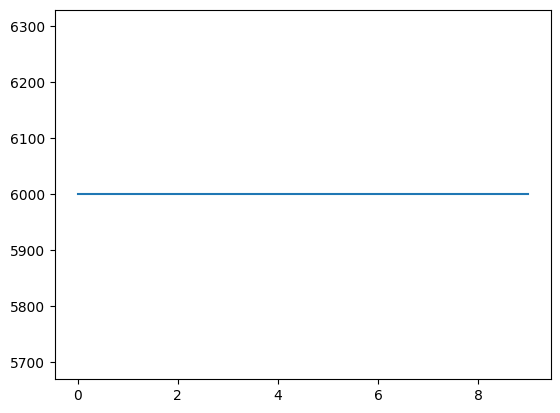

In [6]:
#看一下图片以及标签分布状况
num_class = len(train_set.classes)
print(num_class) # 可以看到这几个数据集都是只有10个标签的
cls_list = [(train_set.targets == i).sum().item() for i  in range(num_class)]
print(cls_list) # 经过统计发现每个类别 样本总数是均匀分布（这一步是很有必要的，因为如果标签分布特别不均匀会导致模型性能很差）

import matplotlib.pylab as plt
plt.figure()
plt.plot(range(num_class),cls_list) #绘制标签分布折线图  当num_class小时也可以采用直方图

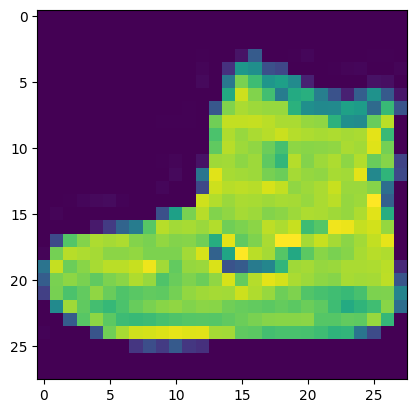

In [7]:
# 给数据绘制图形
plt.figure()
plt.imshow(train_set[0][0].squeeze(0)) # 去掉第一个维度 即将【1,28,28】 转换为【28,28】

# 第三步、构造模型

这里我们构造一个经典的CNN

In [8]:
from model.linnear.CNN import CNN
model = CNN(args)

# 第四步  深度学习建模中 应该是 训练模型

In [9]:
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn as nn
import torch
train_loader = DataLoader(train_set,batch_size=args.batch_size,shuffle=True,pin_memory=True) # num_workers 一般不指定当使用cmd运行时可以视情况而定
test_loader = DataLoader(test_set,batch_size=4*args.batch_size,shuffle=False,pin_memory=True)    
optm = Adam(model.parameters(),lr=1e-3) #lr 不宜过大
creation = nn.NLLLoss() # 可以与log_softmax配合组成becloss  也就是二元交叉熵损失

In [10]:
from train_eval.base import train
train(model,train_loader,test_loader,optm,creation,args)

test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.55it/s]


epoch : [0/10] | train : [loss : 155.5715 , acc : 0.8806] |  test : [loss : 7.3089 , acc : 0.8675]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.43it/s]


epoch : [1/10] | train : [loss : 103.1101 , acc : 0.9194] |  test : [loss : 5.4631 , acc : 0.9033]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.81it/s]


epoch : [2/10] | train : [loss : 88.7327 , acc : 0.9323] |  test : [loss : 5.3251 , acc : 0.9056]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.57it/s]


epoch : [3/10] | train : [loss : 75.1819 , acc : 0.9400] |  test : [loss : 5.2843 , acc : 0.9052]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.49it/s]


epoch : [4/10] | train : [loss : 54.6259 , acc : 0.9573] |  test : [loss : 5.2644 , acc : 0.9121]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.85it/s]


epoch : [5/10] | train : [loss : 42.6746 , acc : 0.9661] |  test : [loss : 5.7317 , acc : 0.9137]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.63it/s]


epoch : [6/10] | train : [loss : 37.5667 , acc : 0.9710] |  test : [loss : 6.0777 , acc : 0.9143]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]


epoch : [7/10] | train : [loss : 32.5867 , acc : 0.9745] |  test : [loss : 6.8418 , acc : 0.9093]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.85it/s]


epoch : [8/10] | train : [loss : 25.7172 , acc : 0.9791] |  test : [loss : 7.5071 , acc : 0.9109]  


test:test_data: 100%|██████████| 20/20 [00:02<00:00,  8.82it/s]

epoch : [9/10] | train : [loss : 17.9900 , acc : 0.9859] |  test : [loss : 7.7124 , acc : 0.9125]  


# 第五步测试模型
## 第一部分 测试模型准确率

# 第二部分绘制训练中的损失以及准确率图像

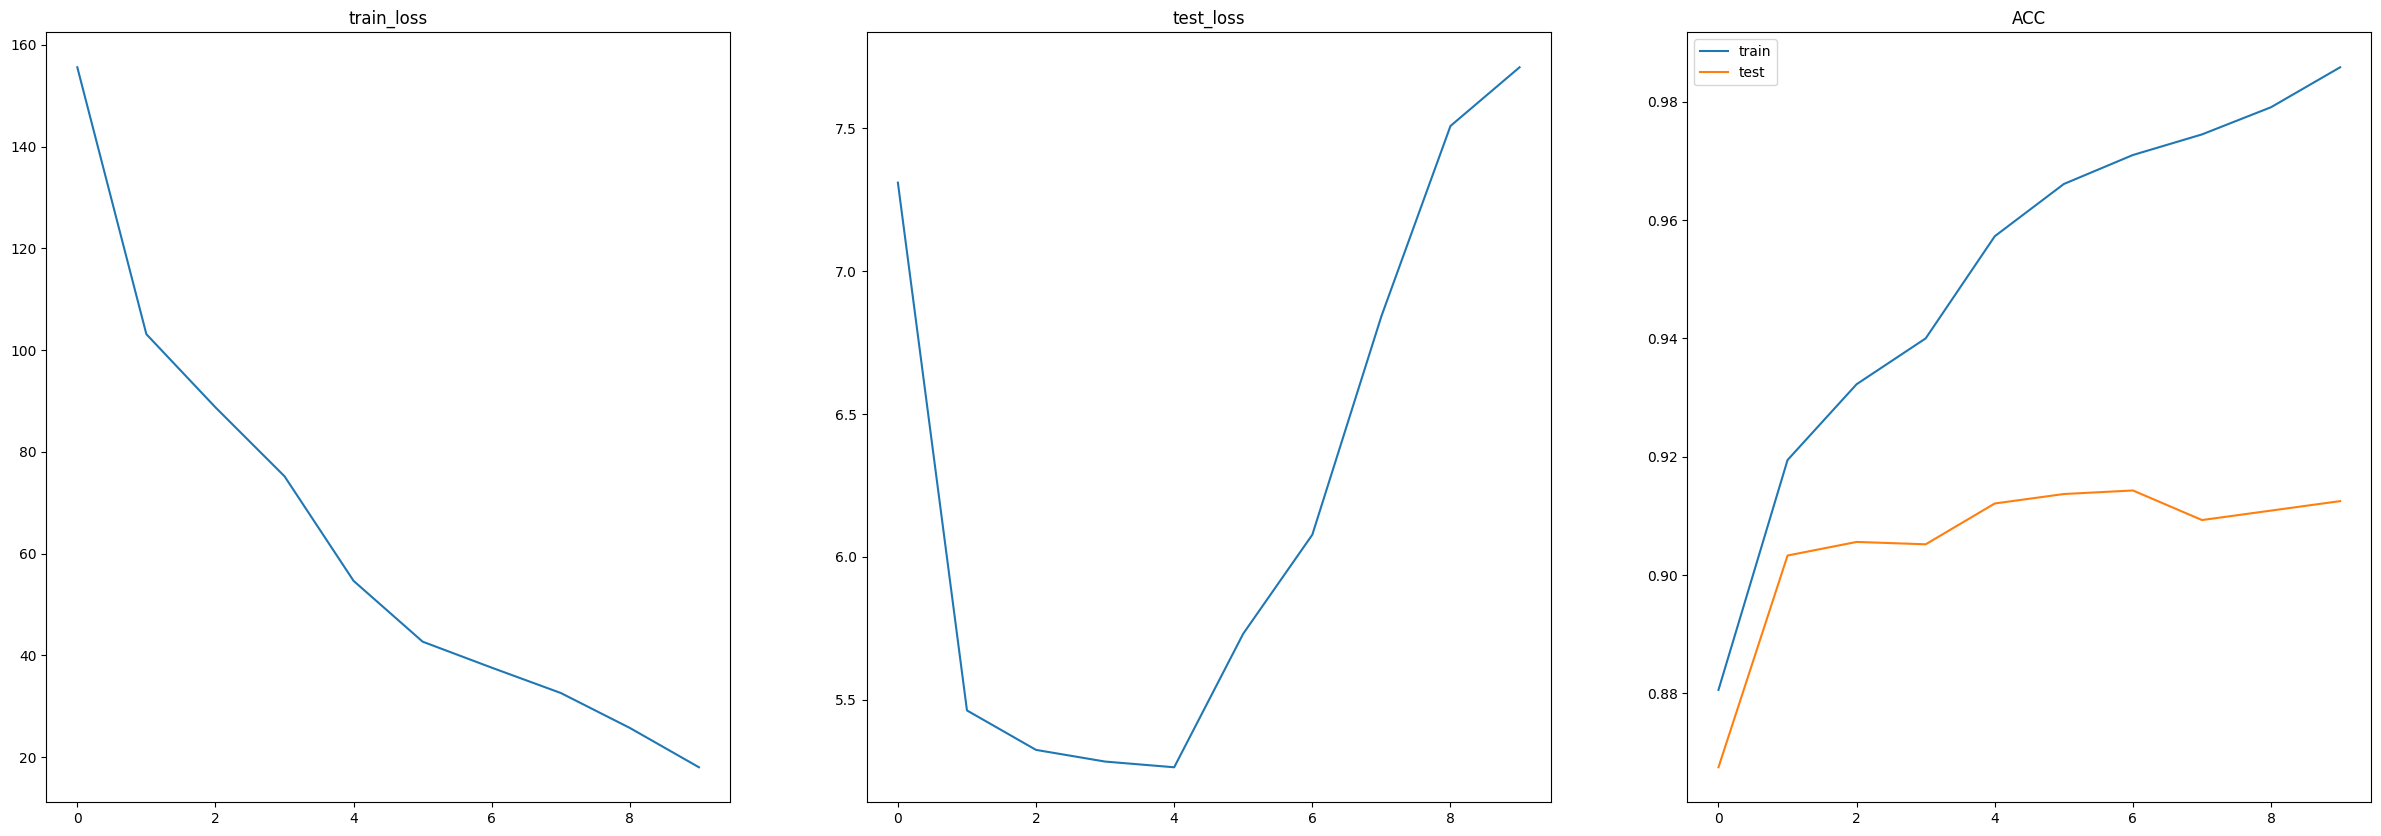

In [36]:
from util.io import get_save_file
import os
import numpy as np
def get_fig_file(args):
    file = 'fig/{}/{}/'.format(args.dataset,args.model)
    if not os.path.exists(file):
        os.makedirs(file)
    return file


file  = get_save_file(args)
fig,axiss = plt.subplots(1,3,figsize = (30 ,10))
train_losss = np.load(file + 'train_losss.npy')
train_accs = np.load(file + 'train_accs.npy')
test_losss = np.load(file + 'test_losss.npy')
test_accs = np.load(file + 'test_accs.npy')

axiss[0].plot(range(10),train_losss)
axiss[1].plot(range(10),test_losss)
axiss[2].plot(range(10),train_accs,label = 'train')
axiss[2].plot(range(10),test_accs,label = 'test')
axiss[2].legend()
axiss[2].set_title('ACC')
axiss[0].set_title('train_loss')
axiss[1].set_title('test_loss')
fig.savefig(get_fig_file(args) + 'loss_andacc.svg',dpi = 1200)

### 训练损失正常下降 表示模型并未发散 （如果训练时损失出现nan 则表示模型发散了、一般是损失函数设置出现问题）

### 测试损失先下降后上升 表示模型可能过拟合（过拟合与欠拟合应该结合损失与准确率综合判断）

### 准确率都是正常上升的趋势 表示模型一切正常

# 第三部分tsne 分析


In [11]:
from  sklearn import manifold

# tsne func
def get_tsne(x):
    tsne = manifold.TSNE(n_components=2)
    x_tsne = tsne.fit_transform(x)
    x_tsne = (x_tsne-x_tsne.min())/(x_tsne.max() - x_tsne.min())
    return x_tsne


In [12]:
model.eval()
layers = ['cov1','cov2','cov3','cov4','linler']
outputs = {i:[] for i in layers}
outputs['classfire'] = []
for data,lable in test_loader:
    data = data.cuda()
    y,outs = model(data)
    for i in layers:
        if i != 'linler':
            outputs[i].append(torch.flatten(outs[i],start_dim=1))
        else :
            outputs[i].append(outs[i])

    outputs['classfire'].append(y)

layers.append('classfire')
for i in layers:
    outputs[i] = get_tsne(torch.cat(outputs[i],dim=0).cpu().detach().numpy()) 

# 321min 可以看到这个tsne分析在处理大量数据时是非常吃时间的 所以在分析任务当中应该尽量避免使用tsne去可视化一个非常庞大的数据

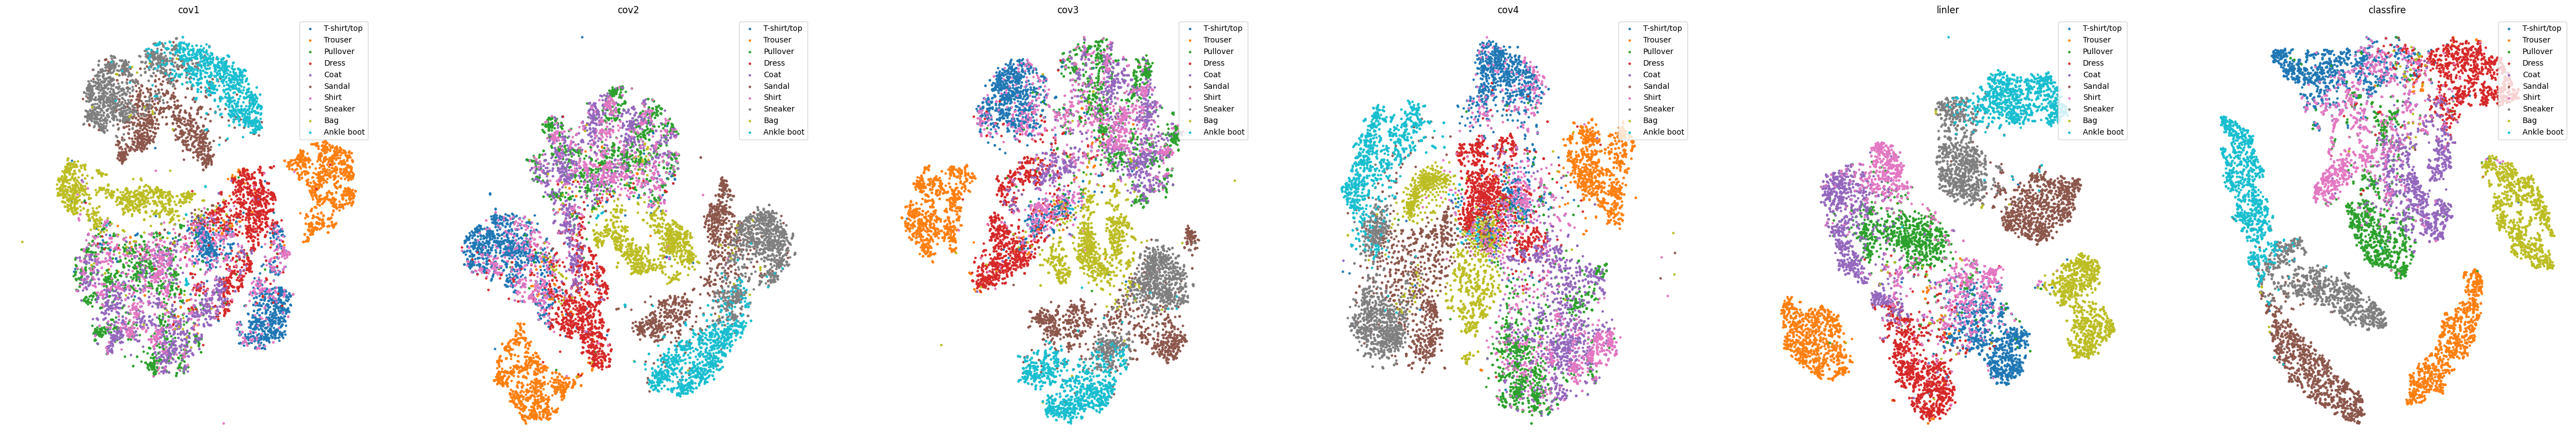

In [61]:
fig,axess = plt.subplots(1,len(layers),figsize = (len(layers)  * 10 ,10))
for index,name in enumerate(layers):
    for classes in range(num_class):
        temp = outputs[name][test_set.targets == classes]
        axess[index].scatter( temp[:,0],temp[:,1],s = 5,label = test_set.classes[classes])
        
    axess[index].legend(loc = 'upper right')
    axess[index].set_title(name)
    axess[index].set_axis_off()
fig.savefig(get_fig_file(args) + 'tsne.svg',dpi = 1200) # 这是一个可以直接可视化模型某个层的输出的手段，它在大部分论文中占据重要地位

# 额外的一步 整合代码 方便移植

# 第六步撰写报告（略）
# 第七步模型应用（略）